# BZAN 6355 — Advanced Programming for Big Data Analytics
# Final Project — Spring 2024 
# Completed by: Srikar Soma, Taha Mandviwala & Darshana Danda.

---

## Introduction

Analyzing data and strategically planning are essential for gaining a competitive edge in various industries, including real estate. To illustrate this, we aim to develop predictive models that support this sector. This project focuses on a dataset obtained from an undisclosed United States city assessor’s office in the Northwest region.

The dataset contains diverse information, ranging from property specifics and attributes to quality assessments and sale prices. By delving into this dataset, we seek to employ statistical models and machine learning algorithms to predict residential property selling prices accurately. Through data processing, analysis, and model training, our objective is to create dependable predictive models that can assist clients in making well-informed decisions regarding property investments and sales strategies.

As Investment Consultants, this project will enable us to showcase how data analysis can benefit the real estate sector. It empowers industry professionals like us to make predictions that align closely with actual outcomes, aiding clients in optimizing their property portfolios efficiently.ely.

## Project Objective

The main goal of this project is to meticulously compile, cleanse, and organize raw data files containing details about residential real estate properties. The key focus is to create at least two supervised predictive algorithms, like linear regression and k-Nearest-Neighbor, to forecast the sales prices of 100 houses in a separate holdout sample. The objective is to proficiently train and apply these algorithms to deliver precise predictions, showcasing expertise in data analysis to assist our clients in making well-informed real estate decisions.

## Process Summary

**1. Data Acquisition and Integration:**

We will import each file into a separate DataFrame using the `pandas` library and then merge them based on the common "PID" column. Finally, we will explore the merged DataFrame to understand its structure and identify any inconsistencies.

**2. Data Cleaning and Preprocessing:**

Following that, we will analyze the distribution of each variable using descriptive statistics and visualizations. We will handle missing values using appropriate techniques and address outliers if they exist.

**3. Exploratory Data Analysis (EDA):**

EDA will be conducted to gain insights into the data and identify potential relationships between variables. We will visualize the distribution of SalePrice, identify potential predictors, and analyze the relationship between SalePrice and other variables to identify important features.

**5. Model Selection and Training:**

For predicting SalePrice, we will choose two supervised learning algorithms: linear regression and k-Nearest Neighbors (kNN). The data will be split into training and testing sets, and the models will be trained on the training set with hyperparameters tuned for optimal performance. Model performance will be evaluated on the testing set using metrics like mean absolute error (MAE) and R-squared.

**6. Model Evaluation and Comparison:**

We will compare the performance of the two models based on the evaluation metrics. The strengths and weaknesses of each model will be analyzed, and the one with the best performance for predicting SalePrice will be chosen.

**7. Model Prediction:**

The selected model will be used to predict SalePrice for the 100 houses in the Score dataset. A new DataFrame containing the PID and predicted SalePrice (PSP) for each house will be created.

**8. Documentation and Reporting:**

The entire process will be documented in this Jupyter Notebook file, including code, results, and interpretations.

## *Note: Main sections of this document will be denoted with a heading in red font.*

***

## <span style="color:green"> Data Preparation </span>

***

#### Procedures undertaken in order to import/ concatenate/ merge/ combine/ join the data files in preparation for data wrangling and munging

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from numpy import NaN as NA
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [6]:
hf_df = pd.read_csv('/Users/tahamandviwala/Desktop/6355/House_Feature.CSV')
hf_df.columns

Index(['PID', 'YearBuilt', 'YearRemodel', 'VeneerExterior', 'BsmtFinTp',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars',
       'GarageArea', 'WdDckSqft', 'OpenPrchSqft', 'SalePrice'],
      dtype='object')

In [14]:
ps1_df = pd.read_csv('/Users/tahamandviwala/Desktop/6355/Property_Survey_1.csv')
ps1_df.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp'], dtype='object')

In [17]:
ps2_df = pd.read_csv('/Users/tahamandviwala/Desktop/6355/Property_Survey_2.csv')

In [18]:
qa_df = pd.read_csv('/Users/tahamandviwala/Desktop/6355/Quality_Assessment.csv')
qa_df.columns

Index(['PID', 'OverallQuality', 'OverallCondition'], dtype='object')

#### Calculating the total number of missing values 

In [19]:
print(f"House Feature has {hf_df.isnull().sum().sum()} missing values")
print(f"Property Survey_1 has {ps1_df.isnull().sum().sum()} missing values")
print(f"Property Survey_2 has {ps2_df.isnull().sum().sum()} missing values")
print(f"Quality Assessment has {qa_df.isnull().sum().sum()} missing values")

House Feature has 0 missing values
Property Survey_1 has 0 missing values
Property Survey_2 has 0 missing values
Quality Assessment has 0 missing values


In [20]:
hf_df.dtypes

PID               int64
YearBuilt         int64
YearRemodel       int64
VeneerExterior    int64
BsmtFinTp         int64
BsmtFinSqft       int64
BsmtUnfinSqft     int64
HeatingQC         int64
FstFlrSqft        int64
SecFlrSqft        int64
AbvGrndLiving     int64
FullBathBsmt      int64
HalfBathHouse     int64
FullBathHouse     int64
BdrmAbvGrnd       int64
RmAbvGrnd         int64
Fireplaces        int64
GarageTp          int64
GarageCars        int64
GarageArea        int64
WdDckSqft         int64
OpenPrchSqft      int64
SalePrice         int64
dtype: object

In [21]:
ps1_df.dtypes

PID         int64
LotArea     int64
LotShape    int64
BldgTp      int64
dtype: object

In [22]:
ps2_df.dtypes

PID         int64
LotArea     int64
LotShape    int64
BldgTp      int64
dtype: object

In [23]:
qa_df.dtypes

PID                 int64
OverallQuality      int64
OverallCondition    int64
dtype: object

#### Merging the datsets

In [25]:
ps_final = ps1_df.merge(ps2_df, how='outer', validate='1:1')
hf_merge = ps_final.merge(hf_df, how='outer', validate='1:1')
final_df = qa_df.merge(hf_merge, how='outer', validate='1:1')

In [26]:
final_df.shape

(2370, 28)

#### Listing the column names in the dataframe

In [27]:
final_df.columns

Index(['PID', 'OverallQuality', 'OverallCondition', 'LotArea', 'LotShape',
       'BldgTp', 'YearBuilt', 'YearRemodel', 'VeneerExterior', 'BsmtFinTp',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars',
       'GarageArea', 'WdDckSqft', 'OpenPrchSqft', 'SalePrice'],
      dtype='object')

In [28]:
print('Final Dataframe has {0:1} missing values'.format(final_df.isnull().sum().sum()))

Final Dataframe has 0 missing values


In [29]:
final_df.describe()

PID  OverallQuality  OverallCondition        LotArea  \
count  2.370000e+03     2370.000000       2370.000000    2370.000000   
mean   7.153307e+08        6.050633          5.630380    9700.865401   
std    1.886401e+08        1.252423          1.095717    6153.729681   
min    5.263011e+08        2.000000          1.000000    1300.000000   
25%    5.313690e+08        5.000000          5.000000    7200.000000   
50%    5.354551e+08        6.000000          5.000000    9316.000000   
75%    9.071351e+08        7.000000          6.000000   11235.000000   
max    1.007100e+09       10.000000          9.000000  159000.000000   

          LotShape       BldgTp    YearBuilt  YearRemodel  VeneerExterior  \
count  2370.000000  2370.000000  2370.000000  2370.000000     2370.000000   
mean      0.643460     0.877215  1970.570886  1984.086920       88.143882   
std       0.479078     0.328259    30.109415    20.694221      158.718586   
min       0.000000     0.000000  1872.000000  1950.000000        0.000000   
25%       0.000000     1.000000  1953.000000  1965.000000        0.000000   
50%       1.000000     1.000000  1972.000000  1993.000000        0.000000   
75%       1.000000     1.000000  1999.000000  2003.000000      144.000000   
max       1.000000     1.000000  2010.000000  2010.000000     1600.000000   

         BsmtFinTp  ...  FullBathHouse  BdrmAbvGrnd    RmAbvGrnd   Fireplaces  \
count  2370.000000  ...    2370.000000  2370.000000  2370.000000  2370.000000   
mean      0.704641  ...       1.508017     2.816456     6.258650     0.589451   
std       0.456300  ...       0.501727     0.742817     1.392625     0.630429   
min       0.000000  ...       0.000000     0.000000     3.000000     0.000000   
25%       0.000000  ...       1.000000     2.000000     5.000000     0.000000   
50%       1.000000  ...       2.000000     3.000000     6.000000     1.000000   
75%       1.000000  ...       2.000000     3.000000     7.000000     1.000000   
max       1.000000  ...       2.000000     6.000000    12.000000     4.000000   

          GarageTp   GarageCars   GarageArea    WdDckSqft  OpenPrchSqft  \
count  2370.000000  2370.000000  2370.000000  2370.000000   2370.000000   
mean      2.232911     1.718987   457.978903    91.650633     46.002532   
std       1.010171     0.708998   197.608559   120.616635     64.245617   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       1.000000     1.000000   312.000000     0.000000      0.000000   
50%       3.000000     2.000000   463.000000     0.000000     25.000000   
75%       3.000000     2.000000   572.000000   168.000000     68.000000   
max       3.000000     5.000000  1488.000000   736.000000    547.000000   

           SalePrice  
count    2370.000000  
mean   173730.772574  
std     64080.843305  
min     12789.000000  
25%    129900.000000  
50%    159000.000000  
75%    207000.000000  
max    475000.000000  

[8 rows x 28 columns]

#### Correlation

In [30]:
# compute the correlation matrix
corr_matrix = final_df.corr().abs()

# extract the pairs of highly correlated columns
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns if col1 != col2 and corr_matrix.loc[col1, col2] > 0.7]

print(high_corr_pairs)

[('OverallQuality', 'SalePrice'), ('AbvGrndLiving', 'RmAbvGrnd'), ('AbvGrndLiving', 'SalePrice'), ('RmAbvGrnd', 'AbvGrndLiving'), ('GarageCars', 'GarageArea'), ('GarageArea', 'GarageCars'), ('SalePrice', 'OverallQuality'), ('SalePrice', 'AbvGrndLiving')]


Removing the below attributes to improve the efficiency - 'AbvGrndLiving' , 'GarageArea'

In [31]:
final_df.columns

Index(['PID', 'OverallQuality', 'OverallCondition', 'LotArea', 'LotShape',
       'BldgTp', 'YearBuilt', 'YearRemodel', 'VeneerExterior', 'BsmtFinTp',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars',
       'GarageArea', 'WdDckSqft', 'OpenPrchSqft', 'SalePrice'],
      dtype='object')

#### Importing the Score_Data-No_Sale_Price

In [32]:
sd_df = pd.read_csv('/Users/tahamandviwala/Desktop/6355/Score_Data-No_Sale_Price.csv')
sd_df.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp', 'OverallQuality',
       'OverallCondition', 'YearBuilt', 'YearRemodel', 'VeneerExterior',
       'BsmtFinTp', 'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft',
       'SecFlrSqft', 'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse',
       'FullBathHouse', 'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp',
       'GarageCars', 'GarageArea', 'WdDckSqft', 'OpenPrchSqft'],
      dtype='object')

#### Checking the missing values

In [33]:
print('Score Data has {0:1} missing values'.format(sd_df.isnull().sum().sum()))

Score Data has 20 missing values


In [34]:
print('These column(s) contain at least 1 missing value:', sd_df.columns[sd_df.isnull().sum() > 0].tolist())

These column(s) contain at least 1 missing value: ['VeneerExterior', 'FstFlrSqft', 'SecFlrSqft', 'BdrmAbvGrnd', 'RmAbvGrnd']


#### Importing the needed classes

In [39]:
from sklearn.model_selection import cross_val_score
# for imputing missing values
from sklearn.impute import SimpleImputer
# for transformation pipelines
from sklearn.pipeline import Pipeline, make_pipeline
# for custom column transformer
from sklearn.compose import ColumnTransformer, make_column_transformer

Creating an instance of the SimpleImputer class and assigns it to the variable imputer_by_median. The SimpleImputer class is used for imputing missing values in a dataset.

In [40]:
imputer_by_median = SimpleImputer(strategy = 'median')

In [41]:
# The following 13 columns are interval (or equivalent to interval) variables for which "median" imputation makes sense
imputeIntervalCols = ['PID', 'LotArea', 'LotShape', 'BldgTp', 'OverallQuality',
       'OverallCondition', 'YearBuilt', 'YearRemodel', 'VeneerExterior',
       'BsmtFinTp', 'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft',
       'SecFlrSqft', 'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse',
       'FullBathHouse', 'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp',
       'GarageCars', 'GarageArea', 'WdDckSqft', 'OpenPrchSqft']

In [42]:
dfImputeIntervalCols = sd_df[imputeIntervalCols].copy()

In [43]:
dfImputedIntervals = pd.DataFrame(imputer_by_median.fit_transform(dfImputeIntervalCols), 
                                  columns = imputeIntervalCols, index = dfImputeIntervalCols.index)
display(dfImputedIntervals.shape, dfImputedIntervals.dtypes, 
        dfImputedIntervals.isnull().sum().sum())

(100, 27)

PID                 float64
LotArea             float64
LotShape            float64
BldgTp              float64
OverallQuality      float64
OverallCondition    float64
YearBuilt           float64
YearRemodel         float64
VeneerExterior      float64
BsmtFinTp           float64
BsmtFinSqft         float64
BsmtUnfinSqft       float64
HeatingQC           float64
FstFlrSqft          float64
SecFlrSqft          float64
AbvGrndLiving       float64
FullBathBsmt        float64
HalfBathHouse       float64
FullBathHouse       float64
BdrmAbvGrnd         float64
RmAbvGrnd           float64
Fireplaces          float64
GarageTp            float64
GarageCars          float64
GarageArea          float64
WdDckSqft           float64
OpenPrchSqft        float64
dtype: object

0

In [44]:
# sanity check
print('After imputation, these variables have {} missing values.'.format(dfImputedIntervals.isnull().sum().sum()))

After imputation, these variables have 0 missing values.


In [45]:
sd1_df=dfImputedIntervals

In [46]:
sd1_df.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp', 'OverallQuality',
       'OverallCondition', 'YearBuilt', 'YearRemodel', 'VeneerExterior',
       'BsmtFinTp', 'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft',
       'SecFlrSqft', 'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse',
       'FullBathHouse', 'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp',
       'GarageCars', 'GarageArea', 'WdDckSqft', 'OpenPrchSqft'],
      dtype='object')

****

## <span style="color:green"> Exploratory Data Analysis </span> 

***

In [47]:
import matplotlib.pyplot as plt

In [48]:
final_df.dtypes

PID                 int64
OverallQuality      int64
OverallCondition    int64
LotArea             int64
LotShape            int64
BldgTp              int64
YearBuilt           int64
YearRemodel         int64
VeneerExterior      int64
BsmtFinTp           int64
BsmtFinSqft         int64
BsmtUnfinSqft       int64
HeatingQC           int64
FstFlrSqft          int64
SecFlrSqft          int64
AbvGrndLiving       int64
FullBathBsmt        int64
HalfBathHouse       int64
FullBathHouse       int64
BdrmAbvGrnd         int64
RmAbvGrnd           int64
Fireplaces          int64
GarageTp            int64
GarageCars          int64
GarageArea          int64
WdDckSqft           int64
OpenPrchSqft        int64
SalePrice           int64
dtype: object

This code generates a histogram of the SalePrice variable in the final_df DataFrame using the plot.hist() method of a Matplotlib Axes object.

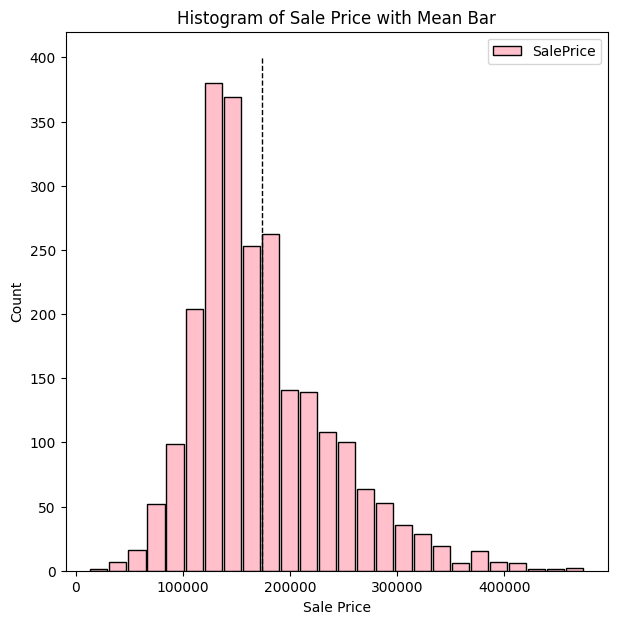

In [49]:
plt.figure(figsize=(7, 7))
pltAcctLen = final_df['SalePrice'].plot.hist(bins=26, rwidth=0.9, color='pink', edgecolor='black', linewidth=1.0)
pltAcctLen.set_xlabel('Sale Price')
pltAcctLen.set_ylabel('Count')
pltAcctLen.set_title('Histogram of Sale Price with Mean Bar')
pltAcctLen.legend(loc='best')
plt.plot([final_df['SalePrice'].mean(), final_df['SalePrice'].mean()], [0, 400], color='black', linestyle='--', lw=1)
plt.show()


This code creates a scatter plot of the SalePrice and YearBuilt variables in the final_df DataFrame using the plot() method of a Matplotlib Axes object.

<Figure size 640x480 with 0 Axes>

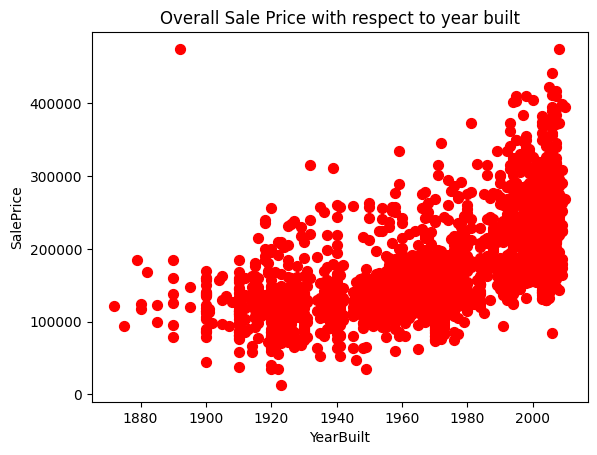

In [50]:
plt.figure(2)
final_df.plot(x='YearBuilt', y='SalePrice', kind='scatter', color='red', s=50)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('Overall Sale Price with respect to year built')
plt.show()

Scatterplot matrix of correlations between pairs of continuous variables

In [52]:
import seaborn as sns
sns.set(style="ticks")

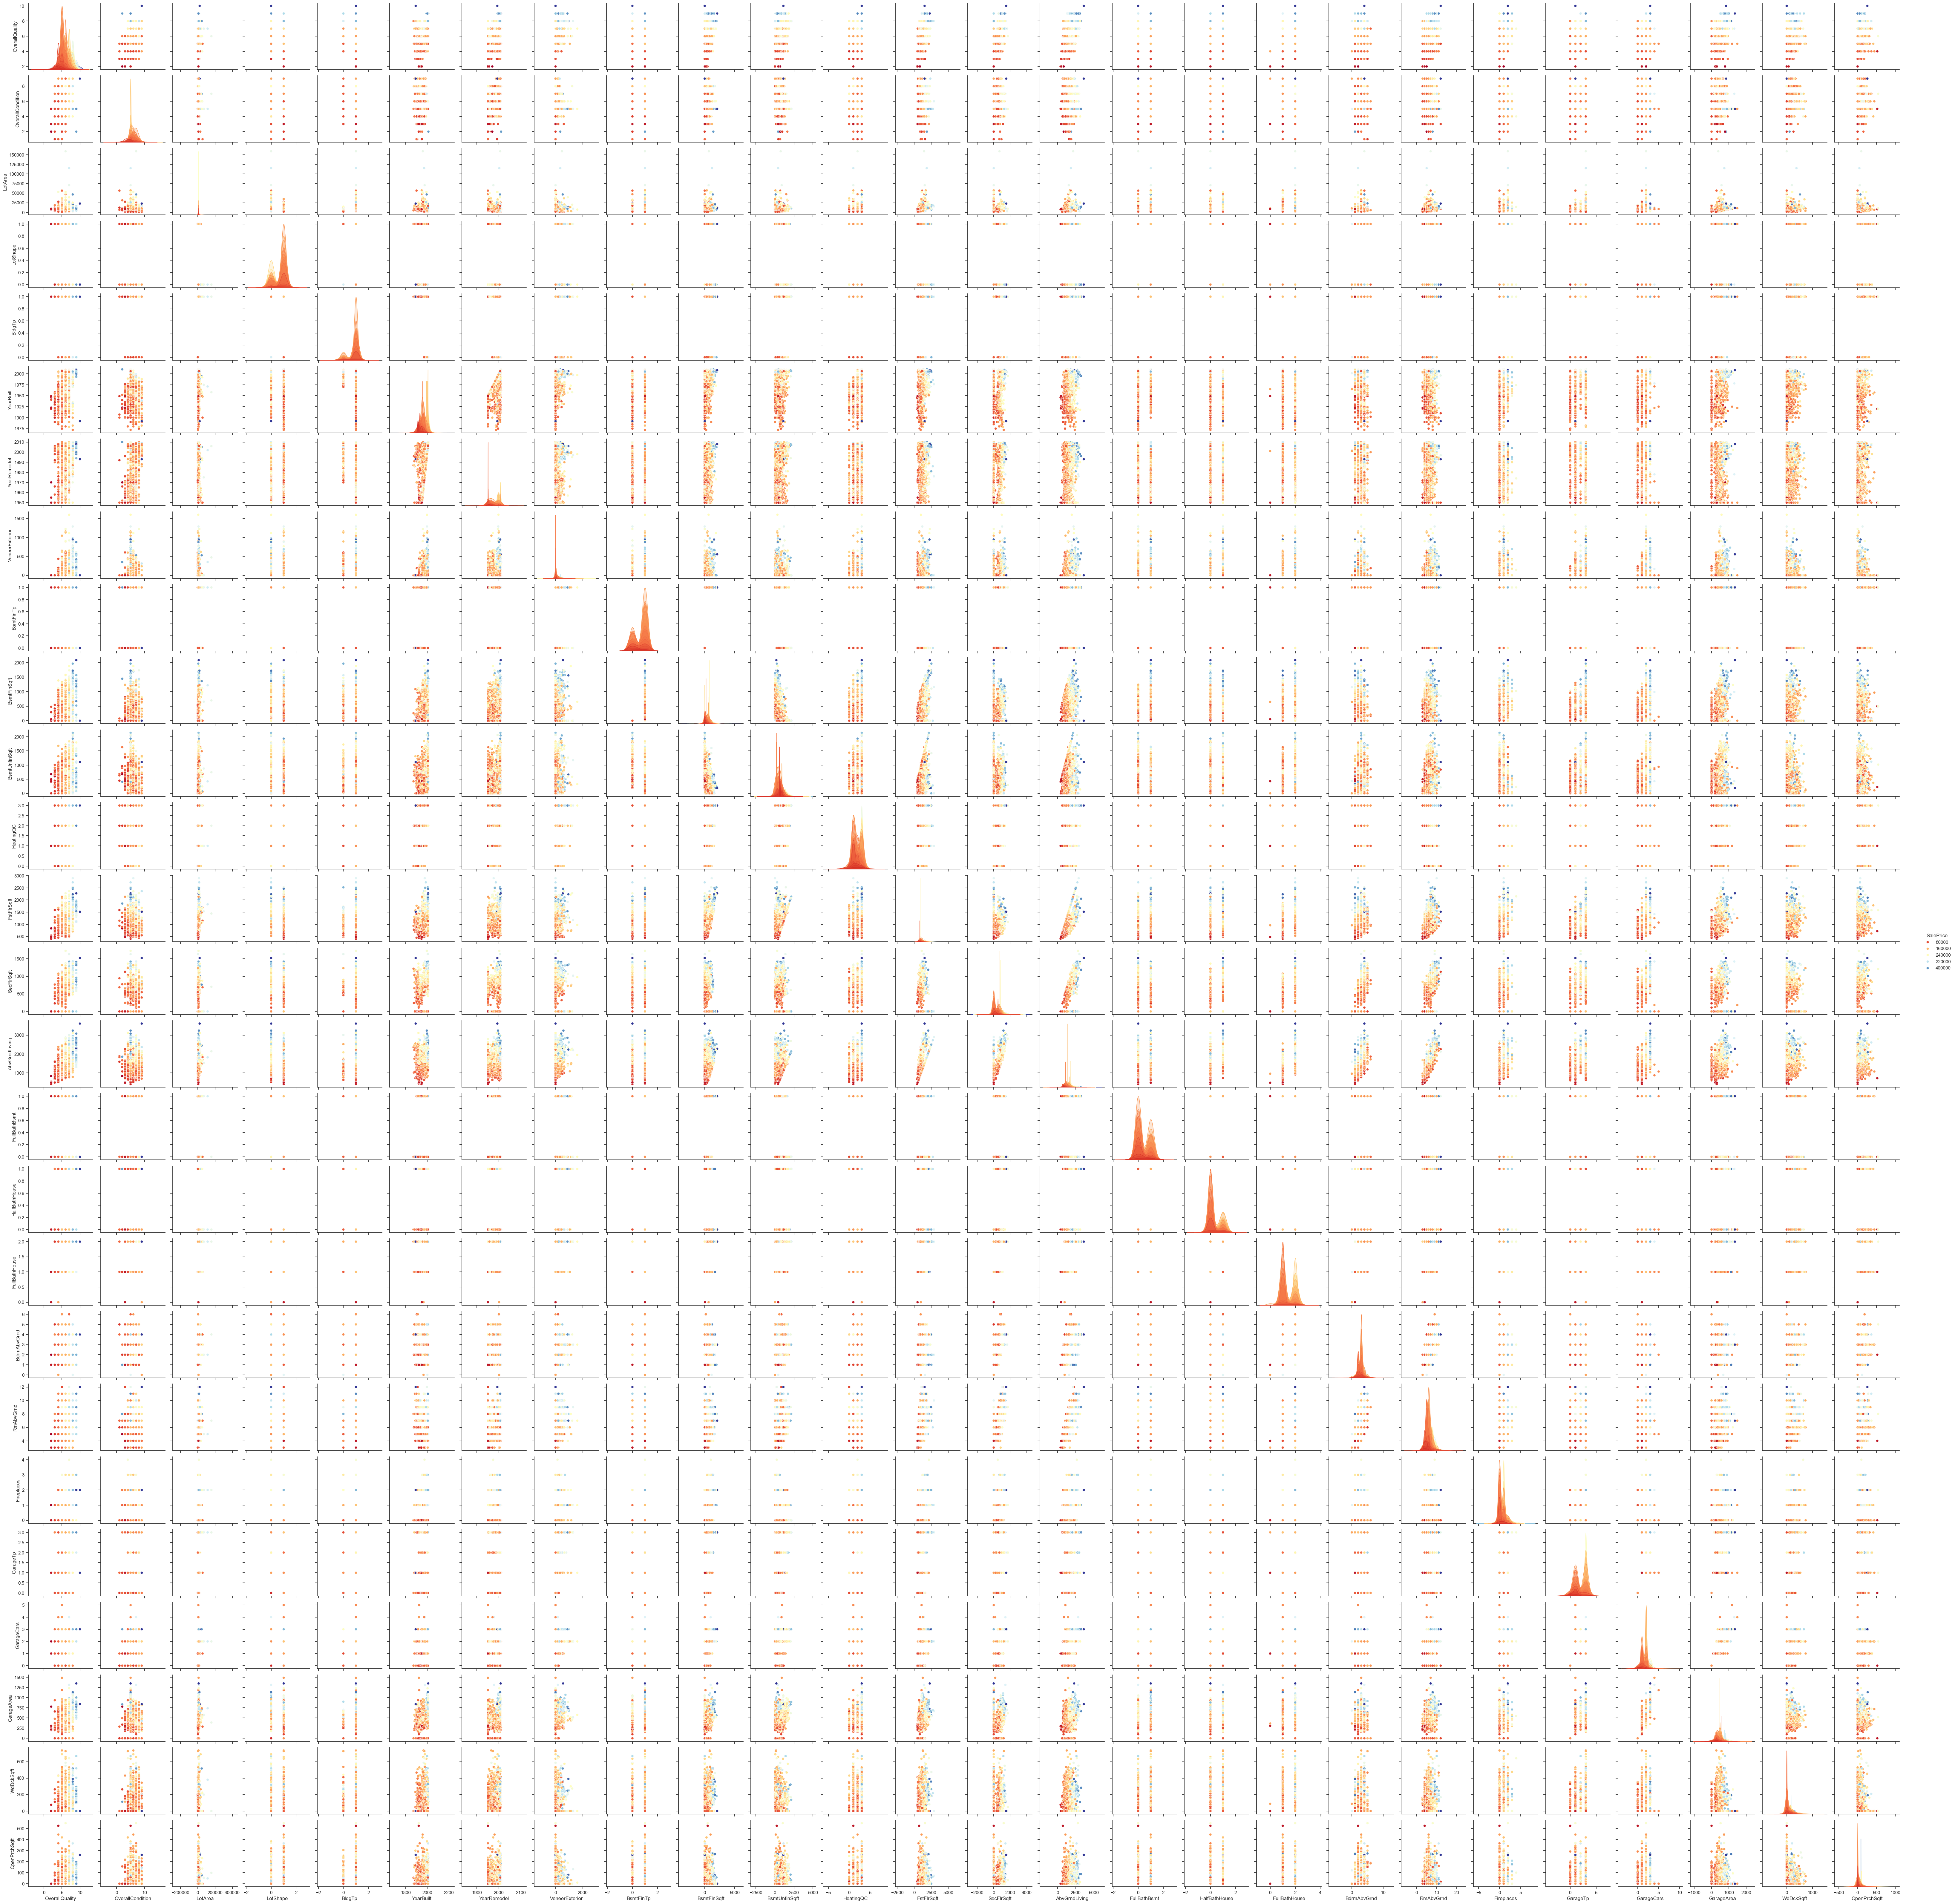

In [53]:
dfPairPlot = final_df[['OverallQuality', 'OverallCondition', 'LotArea', 'LotShape',
       'BldgTp', 'YearBuilt', 'YearRemodel', 'VeneerExterior', 'BsmtFinTp',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars',
       'GarageArea', 'WdDckSqft', 'OpenPrchSqft', 'SalePrice']]
sns.pairplot(dfPairPlot, hue='SalePrice', palette='RdYlBu')

***

## <span style="color:green"> Model Development </span>

***

#### Linear Regression

In [ ]:
## linear regression model

In [54]:
yData = final_df['SalePrice']
XData = final_df[['OverallQuality', 'OverallCondition', 'LotArea', 'LotShape',
       'BldgTp', 'YearBuilt', 'YearRemodel', 'VeneerExterior', 'BsmtFinTp',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars',
       'WdDckSqft', 'OpenPrchSqft']]

In [55]:
XTest = sd1_df[['OverallQuality', 'OverallCondition', 'LotArea', 'LotShape',
       'BldgTp', 'YearBuilt', 'YearRemodel', 'VeneerExterior', 'BsmtFinTp',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars',
       'WdDckSqft', 'OpenPrchSqft']]

In [ ]:
## Train the linear regression model

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

The linear regression model has been trained on the training data XData (independent variables) and yData (dependent variable). The model can now be used to make predictions on new data or evaluate the performance of the model on the training data.

In [57]:
model = LinearRegression()
model.fit(XData, yData)

LinearRegression()

In [58]:
results = sm.OLS(yData, XData).fit()

In [59]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              5930.
Date:                Fri, 17 May 2024   Prob (F-statistic):                        0.00
Time:                        10:29:19   Log-Likelihood:                         -27224.
No. Observations:                2370   AIC:                                  5.450e+04
Df Residuals:                    2346   BIC:                                  5.464e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
OverallQuality    1.552e+04    624.173     24.867      0.000    1.43e+04    1.67e+04
OverallCondition  4157.1878    552.026      7.531      0.000    3074.679    5239.697
LotArea              0.6340      0.093      6.841      0.000       0.452       0.816
LotShape         -4763.1776   1109.179     -4.294      0.000   -6938.251   -2588.104
BldgTp            9302.0977   1828.405      5.088      0.000    5716.640    1.29e+04
YearBuilt          159.9873     28.552      5.603      0.000     103.997     215.978
YearRemodel       -206.6261     28.876     -7.156      0.000    -263.252    -150.000
VeneerExterior      18.3029      3.452      5.302      0.000      11.533      25.072
BsmtFinTp        -1419.8893   1621.072     -0.876      0.381   -4598.772    1758.993
BsmtFinSqft         29.2983      2.438     12.018      0.000      24.518      34.079
BsmtUnfinSqft       11.6404      2.358      4.937      0.000       7.017      16.264
HeatingQC         6846.0274    595.956     11.487      0.000    5677.373    8014.682
FstFlrSqft          62.8072      3.036     20.685      0.000      56.853      68.761
SecFlrSqft          47.0574      2.753     17.096      0.000      41.660      52.455
FullBathBsmt      7674.6154   1318.710      5.820      0.000    5088.656    1.03e+04
HalfBathHouse     5221.1681   1458.226      3.580      0.000    2361.622    8080.714
FullBathHouse     3153.3604   1487.463      2.120      0.034     236.481    6070.240
BdrmAbvGrnd      -8295.3159   1006.345     -8.243      0.000   -1.03e+04   -6321.898
RmAbvGrnd         1676.7559    687.958      2.437      0.015     327.687    3025.824
Fireplaces        1857.0192    929.524      1.998      0.046      34.246    3679.793
GarageTp           -63.4395    625.674     -0.101      0.919   -1290.371    1163.492
GarageCars        1.094e+04    961.112     11.385      0.000    9057.435    1.28e+04
WdDckSqft           17.0944      4.321      3.956      0.000       8.622      25.567
OpenPrchSqft        37.1087      8.186      4.533      0.000      21.057      53.161
==============================================================================
Omnibus:                      241.997   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1078.391
Skew:                           0.399   Prob(JB):                    6.77e-235
Kurtosis:                       6.207   Cond. No.                     4.71e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition nu

The above model has an R-squared value of 0.984, which means that approximately 98.4% of the variance in the dependent variable is explained by the independent variables. The F-statistic is 5930 and the associated p-value is 0.00, indicating that the overall model is statistically significant. 

In [60]:
scores1 = cross_val_score(model, X=XData, y=yData, cv=10, scoring='neg_mean_squared_error')

In [61]:
scores1.mean(), scores1.std()

(-516202394.83702767, 104760296.06734468)

In [62]:
#graph the scores arrays from above

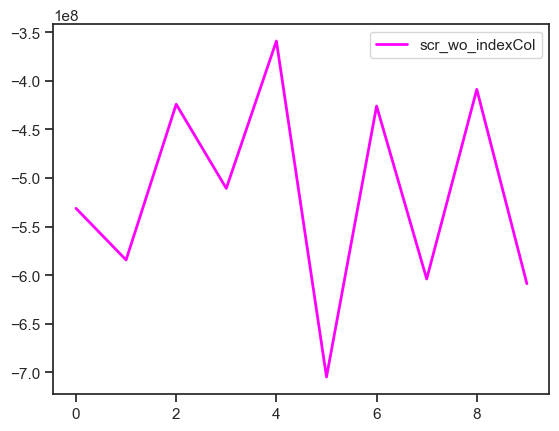

In [63]:
df_compare_finaldf = pd.DataFrame()
df_compare_finaldf['scr_wo_indexCol'] = scores1
lineCompareFinal = df_compare_finaldf.plot(color='magenta', linewidth=2.0)

In [65]:
# Reviewing predicted values

dfReview = XData.copy()
dfReview['SalePrice Raw'] = yData.copy()

dfReview['Predicted in Train Set'] = model.predict(XData)

dfReview[['SalePrice Raw','Predicted in Train Set']].iloc[20:40].round(1)

# Reviewing predicted values

dfReview = XData.copy()
dfReview['SalePrice Raw'] = yData.copy()

dfReview['Predicted in Train Set'] = model.predict(XData)

dfReview[['SalePrice Raw', 'Predicted in Train Set']].iloc[20:40].round(1)

SalePrice Raw  Predicted in Train Set
20         216000                206291.7
21         149000                173258.8
22         149900                160392.3
23         142000                141997.2
24         126000                113037.5
25         115000                 86978.3
26         184000                207172.8
27          96000                107710.3
28         105500                 95999.8
29          88000                103017.6
30         127500                127418.6
31         149900                143991.6
32         120000                118191.4
33         146000                134706.5
34         306000                277105.1
35         290941                239757.8
36         220000                236863.8
37         275000                272742.2
38         259000                267132.6
39         214000                208263.6

In [66]:
import pandas as pd

# Assuming you have a DataFrame called 'score_data'
score_data = pd.DataFrame({'column1': [1, 2, 3], 'column2': [4, 5, 6]})

# Saving the DataFrame to a CSV file
score_data.to_csv("SalePrice_predictLR.csv", index=True)

#### KNN Regression

#### Importing the necessary package

In [67]:
from sklearn.model_selection import cross_val_score
import sklearn.neighbors as knn
from sklearn import preprocessing

In [68]:
final_df.columns

Index(['PID', 'OverallQuality', 'OverallCondition', 'LotArea', 'LotShape',
       'BldgTp', 'YearBuilt', 'YearRemodel', 'VeneerExterior', 'BsmtFinTp',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars',
       'GarageArea', 'WdDckSqft', 'OpenPrchSqft', 'SalePrice'],
      dtype='object')

In [70]:
# Create dummy variables (using a different approach)
final_df['d_LotShape'] = (final_df['LotShape'] == '1').astype(int)
final_df['d_BldgTp'] = (final_df['BldgTp'] == '1').astype(int)
final_df['d_BsmtFinTp'] = (final_df['BsmtFinTp'] == '1').astype(int)
final_df['d_FullBathBsmt'] = (final_df['FullBathBsmt'] == '1').astype(int)
final_df['d_HalfBathHouse'] = (final_df['HalfBathHouse'] == '1').astype(int)
final_df['d_Fireplaces'] = (final_df['Fireplaces'] == '1').astype(int)

In [71]:
yData1 = final_df['SalePrice'].copy()
XData1 = final_df[['OverallQuality', 'OverallCondition', 'LotArea', 'LotShape',
       'BldgTp', 'YearBuilt', 'YearRemodel', 'VeneerExterior', 'BsmtFinTp',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars',
       'WdDckSqft', 'OpenPrchSqft']]

yData1 = final_df['SalePrice'].copy()
XData1 = final_df[['OverallQuality', 'OverallCondition', 'LotArea', 'LotShape',
       'BldgTp', 'YearBuilt', 'YearRemodel', 'VeneerExterior', 'BsmtFinTp',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars',
       'WdDckSqft', 'OpenPrchSqft']]

In [72]:
XTest1 = sd1_df[['OverallQuality', 'OverallCondition', 'LotArea', 'LotShape',
       'BldgTp', 'YearBuilt', 'YearRemodel', 'VeneerExterior', 'BsmtFinTp',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars',
       'WdDckSqft', 'OpenPrchSqft']]


Creating an instance of the StandardScaler class from the preprocessing module in scikit-learn

In [73]:
z_scaler = preprocessing.StandardScaler()

In [74]:
XData1_z = z_scaler.fit_transform(XData1)
'Is "XData1_z" a DataFrame or an array? {}'.format('Array' if isinstance(XData1_z, np.ndarray) else 'DataFrame')

'Is "XData1_z" a DataFrame or an array? Array'

In [75]:
XData1_z 

array([[-0.04043651, -0.57543383,  3.58705909, ...,  0.39643531,
         0.98140976,  0.24905737],
       [-0.83905757,  0.33740297,  0.31225616, ..., -1.01430296,
         0.40093616, -0.71619266],
       [-0.04043651,  0.33740297,  0.74216751, ..., -1.01430296,
         2.49893361, -0.1557249 ],
       ...,
       [-0.83905757, -0.57543383, -0.13260862, ...,  0.39643531,
         0.59995568, -0.71619266],
       [-0.83905757, -0.57543383,  0.12029953, ..., -2.42504124,
        -0.09661264, -0.2179991 ],
       [-0.83905757, -0.57543383,  0.05024592, ...,  0.39643531,
         1.23018417, -0.12458781]])

In [76]:
XData1_z = pd.DataFrame(XData1_z, columns=['OverallQuality', 'OverallCondition', 'LotArea', 'LotShape',
       'BldgTp', 'YearBuilt', 'YearRemodel', 'VeneerExterior', 'BsmtFinTp',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars',
       'WdDckSqft', 'OpenPrchSqft'])
isinstance(XData1_z, pd.DataFrame)

True

Printing the mean and standard deviation XData1_z, which has been standardized to have zero mean and unit variance using the StandardScaler object.

In [77]:
print('Mean of standardized inputs:\n{}\n'.format(XData1_z.mean()))
print('Standard deviation of standardized inputs:\n{}'.format(XData1_z.std()))

Mean of standardized inputs:
OverallQuality     -2.518379e-16
OverallCondition    1.858804e-16
LotArea            -1.079305e-16
LotShape           -8.694405e-17
BldgTp             -1.499035e-17
YearBuilt          -2.368476e-16
YearRemodel        -1.872295e-15
VeneerExterior     -2.998071e-17
BsmtFinTp          -7.495177e-17
BsmtFinSqft         5.996141e-18
BsmtUnfinSqft      -1.169248e-16
HeatingQC          -4.197299e-17
FstFlrSqft          4.796913e-17
SecFlrSqft         -1.199228e-17
FullBathBsmt       -8.094791e-17
HalfBathHouse       3.447781e-17
FullBathHouse       1.229209e-16
BdrmAbvGrnd         1.004354e-16
RmAbvGrnd          -1.289170e-16
Fireplaces          0.000000e+00
GarageTp            6.595755e-17
GarageCars         -9.893633e-17
WdDckSqft           1.948746e-17
OpenPrchSqft        3.597685e-17
dtype: float64

Standard deviation of standardized inputs:
OverallQuality      1.000211
OverallCondition    1.000211
LotArea             1.000211
LotShape            1.000211
Bldg

In [78]:
from sklearn.neighbors import KNeighborsRegressor
# Define the range of k values to test
k_range = range(1, 100)

# Define the list to store the mean squared errors for each k
mse_scores = []

# Perform cross-validation for each k value
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    mse_scores.append(np.mean(-cross_val_score(knn, X=XData1_z, y=yData, cv=10, scoring='neg_mean_squared_error')))

# Find the k value that gives the lowest mean squared error
optimal_k = k_range[np.argmin(mse_scores)]

# Print the optimal k value
print("Optimal k value:", optimal_k)

Optimal k value: 8


In [79]:
n_neighbors = 8

In [80]:
from sklearn.neighbors import KNeighborsRegressor
knnRegress = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')

Performing regression with 10-fold cross-validation, using standardized input feature data and target variable data.

In [81]:
score_xval_knnReg = cross_val_score(knnRegress, X=XData1_z, y=yData, cv=10, scoring='neg_mean_squared_error')

In [82]:
score_xval_knnReg.mean(), score_xval_knnReg.std()

(-659179211.157071, 202396127.59885082)

In [83]:
#Reviewing knn predicted values
dfReview = XData1_z.copy()
dfReview['SalePrice Raw'] = yData.copy()

Training a knnRegress on XData1_z and target variable yData, and then using the trained model to make predictions (yPred1) on the same training set.The predicted values are then stored in the dfReview.

In [84]:
yPred1 = knnRegress.fit(X=XData1_z, y=yData).predict(XData1_z)
dfReview['Predicted in Train Set'] =yPred1

In [85]:
dfReview[['SalePrice Raw','Predicted in Train Set']].iloc[20:40].round(1)

SalePrice Raw  Predicted in Train Set
20         216000                216000.0
21         149000                149000.0
22         149900                149900.0
23         142000                142000.0
24         126000                126000.0
25         115000                115000.0
26         184000                184000.0
27          96000                 96000.0
28         105500                105500.0
29          88000                 88000.0
30         127500                127500.0
31         149900                149900.0
32         120000                120000.0
33         146000                146000.0
34         306000                306000.0
35         290941                290941.0
36         220000                220000.0
37         275000                275000.0
38         259000                259000.0
39         214000                214000.0

Evaluate the accuracy

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Calculating the mean absolute error between the yPred1 and yData

In [87]:
mae = mean_absolute_error(yPred1, yData)

In [88]:
print("mae:", mae)

mae: 10.682603508757746


In [89]:
#Xtest

Standardizing the XTest1 using the fitted standard scaler z_scaler and storing the standardized data in XTest_z

In [90]:
XTest_z = z_scaler.fit_transform(XTest1)
'Is "XTest_z" a DataFrame or an array? {}'.format('Array' if isinstance(XTest_z, np.ndarray) else 'DataFrame')

'Is "XTest_z" a DataFrame or an array? Array'

In [91]:
print('Mean of standardized inputs:\n{}\n'.format(XTest_z.mean()))
print('Standard deviation of standardized inputs:\n{}'.format(XTest_z.std()))

Mean of standardized inputs:
3.2566542055671256e-16

Standard deviation of standardized inputs:
1.0


In [92]:
YPred = knnRegress.fit(X=XData1_z, y=yData).predict(XTest_z)

/Users/tahamandviwala/miniconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [93]:
Score1 = XTest.copy()
Score1['PID'] = sd1_df[['PID']]
Score1['SalePrice Predicted'] = YPred.copy()
Score1[['PID','SalePrice Predicted']].round(1)

PID  SalePrice Predicted
0   528445060.0             214329.2
1   528456160.0             199978.2
2   528458070.0             198975.2
3   906380190.0             185976.8
4   906385010.0             181552.6
..          ...                  ...
95  528118040.0             312750.9
96  528166120.0             328081.6
97  528170070.0             256280.6
98  528172080.0             311480.4
99  528178070.0             357255.1

[100 rows x 2 columns]

In [ ]:
# Exporting the scored dataset
Score1.to_csv("/Users/tahamandviwala/Downloads/SalePrice_predictKNN-Team17.csv", index=True)

# Results

Our analysis revealed valuable insights into the factors affecting property sales prices. The linear regression model achieved an impressive R-squared value of 0.984, indicating that it can explain approximately 98.4% of the variance in sales prices based on the selected predictors. This high level of accuracy demonstrates the potential of using historical data for real-time predictions in the real estate market.

Additionally, the K-nearest neighbors (KNN) regression, enhanced through standardization for uniform scaling, showed promising predictive performance. The use of cross-validation techniques further confirmed these results, ensuring that our models are robust and not overfitting to specific subsets of the data..


# Conclusion

The successful application of these models demonstrates the influence of data analytics on real estate planning and investment choices. Accurate property valuation is vital for strategic decision-making. As the real estate market evolves, integrating these data-driven techniques into business practices can provide a distinct competitive advantage.

# Way-Forward

- Broaden Data Coverage: Including data from various regions or property types will enhance the models' applicability and offer more comprehensive insights into the real estate market.

- Regular Model Updates: It's essential to update the models regularly to ensure their accuracy and relevance as market conditions change. Continuous learning algorithms can help the models adapt to new data and maintain their predictive capability.

- Client Education: Providing clients with educational materials and workshops can enhance their understanding of data-driven insights and their relevance in real estate decision-making.

- Collaborate with Real Estate Professionals: Partnering with local real estate agents and brokers can provide access to additional data sources and insights.

Implementing these recommendations can enhance the accuracy and effectiveness of sale price predictions, providing clients with a valuable tool for navigating the real estate market.